In [1]:
import numpy as np
from GBM_FOR_ELECTRICITY_TARIFF import generate_GBM_from_data
from ouparams import ouparams
import numpy as np
import scipy.stats as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.integrate import quad
from scipy.interpolate import RegularGridInterpolator
import pandas as pd


file_path = r'C:\Users\kubaw\Desktop\DELFT\THESIS\CH5\Grid_Emissions.csv'

data = pd.read_csv(file_path)

grid_emissions_arr = data.to_numpy()

In [2]:
# Estimating the OU parameters
mu, sigma, theta = ouparams.find(grid_emissions_arr)

-44.24723869017584

In [3]:

N = 25  # time steps
paths = 1000 # number of paths
T = N
T_vec, dt = np.linspace(0, T, N, retstep=True)

kappa = theta
theta = mu
sigma = sigma/1.5
std_asy = np.sqrt(sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0.553
X = np.zeros((N, paths))
X[0, :] = X0
W = ss.norm.rvs(loc=0, scale=1, size=(N - 1, paths))

# Uncomment for Euler Maruyama
#for t in range(0,N-1):
#    X[t + 1, :] = X[t, :] + kappa*(theta - X[t, :])*dt + sigma * np.sqrt(dt) * W[t, :]

std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
for t in range(0, N - 1):
    X[t + 1, :] = theta + np.exp(-kappa * dt) * (X[t, :] - theta) + std_dt * W[t, :]

X_T = X[-1, :]  # values of X at time T
X_1 = X[:, 1]  # a single path

In [4]:
xs = []
for i, ys in enumerate(X):
    xs.append(i)

In [5]:

simulation_df = pd.DataFrame(X, columns=[f'y{i}' for i in range(len(X[0]))])


In [6]:

simulation_df.insert(0, "xs", xs)

In [7]:
import plotly.graph_objects as go
n_paths = paths
ycols = ['y{}'.format(i) for i in range(n_paths)]

# Initialize a figure
fig = go.Figure()

line_opacity = 0.7  
color_sequence = px.colors.qualitative.Pastel  

for i, ycol in enumerate(ycols):
    fig.add_trace(go.Scattergl(x=simulation_df['xs'], y=simulation_df[ycol],
                               mode='lines',
                               line=dict(color=color_sequence[i % len(color_sequence)], width=2),
                               opacity=line_opacity,
                               name=ycol))

fig.add_trace(go.Scattergl(x=simulation_df['xs'], y=[0.036]*len(simulation_df),
                           mode='lines',
                           line=dict(color='red', width=2, dash='dash'),
                           name='Target'))


fig.update_layout(
    plot_bgcolor='#f2f1ee',
    paper_bgcolor='white',
    xaxis=dict(
        title="Year", 
        showline=True,
        showgrid=True,
        gridcolor='white',
        linecolor='white',
    ),
    yaxis=dict(
        title="kg CO2 eq. per kWh", 
        showline=True,
        showgrid=True,
        gridcolor='white',
        linecolor='white',
    ),
    title_font_size=14,
    legend_title_font_size=14
)

# Show the figure
fig.show()

NameError: name 'px' is not defined

In [ ]:
N_processes = 1000  # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)
pdf_fitted = ss.norm.pdf(x, *param)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(T_vec, X[:, :N_processes], linewidth=0.5)
ax1.plot(T_vec, - theta * np.ones_like(T_vec), label="Long term mean")
ax1.legend(loc="upper right")
ax1.set_title(f"{N_processes} OU processes")
ax1.set_xlabel("T")
ax2.plot(x, pdf_fitted, color="r", label="Normal density")
ax2.hist(X_T, density=True, bins=50, facecolor="LightBlue", label="Frequency of X(T)")
ax2.legend()
ax2.set_title("Histogram vs Normal distribution")
ax2.set_xlabel("X(T)")
plt.show()

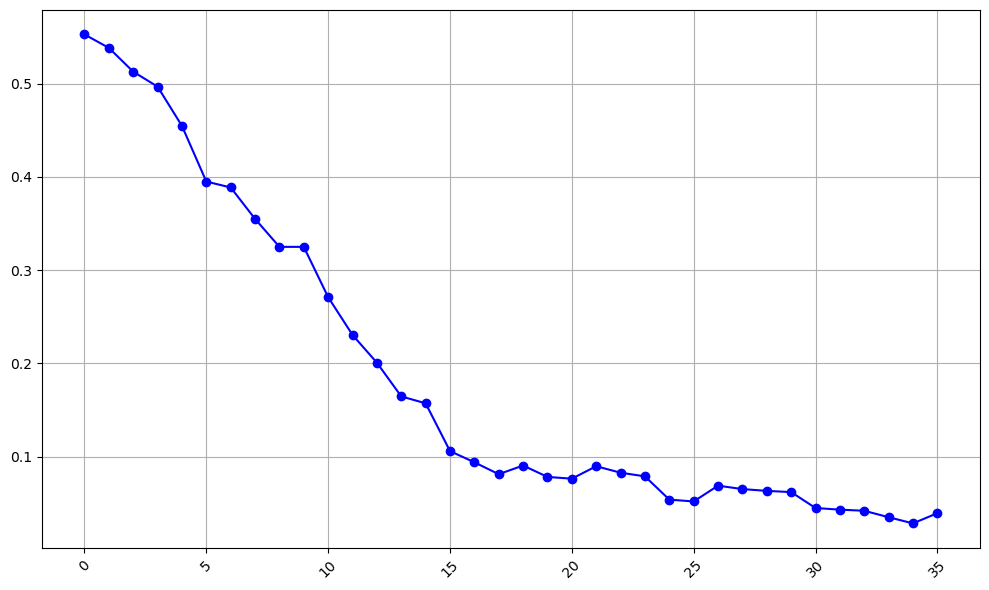

In [690]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(grid_emissions_arr, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()

In [691]:
# Use pandas to read the CSV file
import pandas as pd
grid_emissions_arr
grid_emissions_arrdf = pd.DataFrame(grid_emissions_arr)

In [692]:
import plotly.express as px

fig = px.line(grid_emissions_arrdf, title='Training Reward',
              labels={'Step':'Iteration', 'Value':'Reward'})

fig.update_traces(line=dict(color='#EDAFB8', width=3))

fig.update_layout(
    plot_bgcolor='#f2f1ee', 
    paper_bgcolor='white', 
    xaxis=dict(
        showline=True,
        showgrid=True,
        gridcolor='white', 
        linecolor='white',
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        gridcolor='white', 
        linecolor='white',
    )
)

# Update the font size
fig.update_layout(
    title_font_size=14,
    legend_title_font_size=14
)


# Show the plot
fig.show()